In [1]:
from rmgpy.data.rmg import RMGDatabase
from rmgpy.chemkin import saveChemkinFile, saveSpeciesDictionary
from rmgpy.rmg.model import Species, getFamilyLibraryObject, CoreEdgeReactionModel
from rmgpy import settings
from convertKineticsLibraryToTrainingReactions import addAtomLabelsForReaction

In [2]:
database = RMGDatabase()
libraries = ['C3']
database.load(settings['database.directory'], kineticsFamilies='all', reactionLibraries = libraries, kineticsDepositories='all')

## step1: find fam_rxn for each lib_rxn

In [3]:
reactionDict = {}
for libraryName in libraries:
    kineticLibrary = database.kinetics.libraries[libraryName]
    for index, entry in kineticLibrary.entries.iteritems():
        lib_rxn = entry.item
        lib_rxn.kinetics = entry.data 
        lib_rxn.index = entry.index
        # Let's make RMG generate this reaction from the families!
        fam_rxn_list = []
        rxt_mol_mutation_num = 1
        pdt_mol_mutation_num = 1
        for reactant in lib_rxn.reactants:
            rxt_mol_mutation_num *= len(reactant.molecule)

        for product in lib_rxn.products:
            pdt_mol_mutation_num *= len(product.molecule)

        for mutation_i in range(rxt_mol_mutation_num):
            rxts_mol = [spc.molecule[mutation_i%(len(spc.molecule))] for spc in lib_rxn.reactants]
            pdts_mol = [spc.molecule[0] for spc in lib_rxn.products]
            fam_rxn_list.extend(database.kinetics.generateReactionsFromFamilies(
                        reactants=rxts_mol, products=pdts_mol))

        if len(fam_rxn_list) == 1:
            fam_rxn = fam_rxn_list[0]       
            lib_reactants = [r for r in lib_rxn.reactants]        
            fam_reactants = [r for r in fam_rxn.reactants]
            for lib_reactant in lib_reactants:
                for fam_reactant in fam_reactants:
                    if lib_reactant.isIsomorphic(fam_reactant):
                        fam_reactants.remove(fam_reactant)
                        break

            lib_products = [r for r in lib_rxn.products]        
            fam_products = [r for r in fam_rxn.products]
            for lib_product in lib_products:
                for fam_product in fam_products:
                    if lib_product.isIsomorphic(fam_product):
                        fam_products.remove(fam_product)
                        break

            forward = not (len(fam_reactants) != 0 or len(fam_products) != 0)
            # find the labeled atoms using family and reactants & products from fam_rxn           
            addAtomLabelsForReaction(fam_rxn, database)
            fam_rxn.index = lib_rxn.index
            reactionDict[fam_rxn.family] = [fam_rxn]

36


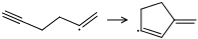

C#CCC[C]=C
C=C1C=[C]CC1


In [13]:
from IPython.display import display
for fam_rxn in reactionDict['Intra_R_Add_Endocyclic']:
    print fam_rxn.index
    display(fam_rxn)
    for spec in fam_rxn.reactants + fam_rxn.products:
        print spec.molecule[0].toSMILES()

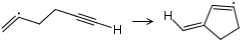

In [5]:
for index, entry in kineticLibrary.entries.iteritems():
    if entry.index == fam_rxn.index:
        lib_rxn = entry.item
        lib_rxn.kinetics = entry.data 
        lib_rxn.index = entry.index
        break
lib_rxn

In [6]:
id(fam_rxn.reactants[0].molecule[0]), id(lib_rxn.reactants[0].molecule[0])

(139792235896656, 139792233264264)

## step2: get fam_rxn's kinetics

Before training RMG estimates fam_rxn's kinetics as $ A = 10^9, n = 0.19, E_a = 83.68 kJ/mol $ at [here](http://rmg.mit.edu/database/kinetics/families/Intra_R_Add_Endocyclic/rate_rules/reactant1=multiplicity%25202%250A1%2520%2520C%2520u0%2520p0%2520c0%2520%257B2%252CS%257D%2520%257B3%252CS%257D%2520%257B8%252CS%257D%2520%257B9%252CS%257D%250A2%2520%2520C%2520u0%2520p0%2520c0%2520%257B1%252CS%257D%2520%257B4%252CS%257D%2520%257B5%252CS%257D%2520%257B6%252CS%257D%250A3%2520%2520C%2520u1%2520p0%2520c0%2520%257B1%252CS%257D%2520%257B7%252CD%257D%250A4%2520%2520C%2520u0%2520p0%2520c0%2520%257B2%252CS%257D%2520%257B10%252CT%257D%250A5%2520%2520H%2520u0%2520p0%2520c0%2520%257B2%252CS%257D%250A6%2520%2520H%2520u0%2520p0%2520c0%2520%257B2%252CS%257D%250A7%2520%2520C%2520u0%2520p0%2520c0%2520%257B3%252CD%257D%2520%257B11%252CS%257D%2520%257B12%252CS%257D%250A8%2520%2520H%2520u0%2520p0%2520c0%2520%257B1%252CS%257D%250A9%2520%2520H%2520u0%2520p0%2520c0%2520%257B1%252CS%257D%250A10%2520C%2520u0%2520p0%2520c0%2520%257B4%252CT%257D%2520%257B13%252CS%257D%250A11%2520H%2520u0%2520p0%2520c0%2520%257B7%252CS%257D%250A12%2520H%2520u0%2520p0%2520c0%2520%257B7%252CS%257D%250A13%2520H%2520u0%2520p0%2520c0%2520%257B10%252CS%257D%250A__product1=multiplicity%25202%250A1%2520%2520C%2520u0%2520p0%2520c0%2520%257B2%252CS%257D%2520%257B3%252CS%257D%2520%257B7%252CS%257D%2520%257B8%252CS%257D%250A2%2520%2520C%2520u0%2520p0%2520c0%2520%257B1%252CS%257D%2520%257B4%252CS%257D%2520%257B9%252CS%257D%2520%257B10%252CS%257D%250A3%2520%2520C%2520u0%2520p0%2520c0%2520%257B1%252CS%257D%2520%257B5%252CS%257D%2520%257B6%252CD%257D%250A4%2520%2520C%2520u1%2520p0%2520c0%2520%257B2%252CS%257D%2520%257B5%252CD%257D%250A5%2520%2520C%2520u0%2520p0%2520c0%2520%257B3%252CS%257D%2520%257B4%252CD%257D%2520%257B11%252CS%257D%250A6%2520%2520C%2520u0%2520p0%2520c0%2520%257B3%252CD%257D%2520%257B12%252CS%257D%2520%257B13%252CS%257D%250A7%2520%2520H%2520u0%2520p0%2520c0%2520%257B1%252CS%257D%250A8%2520%2520H%2520u0%2520p0%2520c0%2520%257B1%252CS%257D%250A9%2520%2520H%2520u0%2520p0%2520c0%2520%257B2%252CS%257D%250A10%2520H%2520u0%2520p0%2520c0%2520%257B2%252CS%257D%250A11%2520H%2520u0%2520p0%2520c0%2520%257B5%252CS%257D%250A12%2520H%2520u0%2520p0%2520c0%2520%257B6%252CS%257D%250A13%2520H%2520u0%2520p0%2520c0%2520%257B6%252CS%257D%250A).

## step3: after training get fam_rxn's kinetics

In [7]:
cem = CoreEdgeReactionModel()
cem.kineticsEstimator = 'rate rules'
cem.verboseComments = True

In [8]:
from rmgpy.kinetics.kineticsdata import KineticsData
from rmgpy.data.kinetics.family import TemplateReaction
from rmgpy.data.kinetics.depository import DepositoryReaction

for idx, spec in enumerate(fam_rxn.reactants):
    spec = Species(label=spec.label, molecule=spec.molecule)
    spec.generateThermoData(database)
    fam_rxn.reactants[idx] = spec
for idx, spec in enumerate(fam_rxn.products):
    spec = Species(label=spec.label, molecule=spec.molecule)
    spec.generateThermoData(database)
    fam_rxn.products[idx] = spec

family = getFamilyLibraryObject(fam_rxn.family)

# If the reaction already has kinetics (e.g. from a library),
# assume the kinetics are satisfactory
if fam_rxn.kinetics is None:
    # Set the reaction kinetics
    kinetics, source, entry, isForward = cem.generateKinetics(fam_rxn)
    fam_rxn.kinetics = kinetics
    # Flip the reaction direction if the kinetics are defined in the reverse direction
    if not isForward:
        fam_rxn.reactants, fam_rxn.products = fam_rxn.products, fam_rxn.reactants
        fam_rxn.pairs = [(p,r) for r,p in fam_rxn.pairs]
    if family.ownReverse and hasattr(fam_rxn,'reverse'):
        if not isForward:
            fam_rxn.template = fam_rxn.reverse.template
        # We're done with the "reverse" attribute, so delete it to save a bit of memory
        delattr(fam_rxn,'reverse')

# convert KineticsData to Arrhenius forms
if isinstance(fam_rxn.kinetics, KineticsData):
    fam_rxn.kinetics = fam_rxn.kinetics.toArrhenius()
#  correct barrier heights of estimated kinetics
if isinstance(fam_rxn,TemplateReaction) or isinstance(fam_rxn,DepositoryReaction): # i.e. not LibraryReaction
    fam_rxn.fixBarrierHeight() # also converts ArrheniusEP to Arrhenius.

if cem.pressureDependence and fam_rxn.isUnimolecular():
    # If this is going to be run through pressure dependence code,
    # we need to make sure the barrier is positive.
    fam_rxn.fixBarrierHeight(forcePositive=True)

In [9]:
fam_rxn.kinetics

Arrhenius(A=(3.47e+11,'s^-1'), n=0.15, Ea=(14,'kcal/mol'), T0=(1,'K'), comment="""Matched reaction 12 C6H7-5 <=> C6H7-6 in Intra_R_Add_Endocyclic/training""")

## step4: compare with lib_rxn's kinetics

In [10]:
lib_rxn.kinetics

Arrhenius(A=(3.47e+11,'s^-1'), n=0.15, Ea=(14,'kcal/mol'), T0=(1,'K'))

## Conclusion: it improves the kinetics by factor of 10,000 at 673 for this reaction